# Градиентный спуск

## Морозова Маргарита, РИ-481223

## Задание 1


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

np.random.seed(0)

In [19]:
from sklearn.base import BaseEstimator

class LinearRegression(BaseEstimator):
    def __init__(self, epsilon=1e-6, max_steps=1000, w0=None, alpha=1e-8):
        
        self.epsilon = epsilon
        self.max_steps = max_steps
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.w_history = []
    
    def fit(self, X, y):
        l, d = X.shape

        if self.w0 is None: # если нет начальной инициализации весов
            self.w0 = np.zeros(d)

        self.w = self.w0

        for step in range(self.max_steps):
            self.w_history.append(self.w)

            w_new = self.w - self.alpha * self.calc_gradient(X, y)

            if (np.linalg.norm(w_new - self.w) < self.epsilon):
                break
          
            self.w = w_new
        
        return self
        ## На каждом шаге градиентного спуска веса можно добавлять в w_history (для последующей отрисовки)
        ## Для выполнения шага выберите 10 случайных(равномерно) сэмплов
       
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        
        l, d = X.shape

        y_pred = []

        for i in range(l):
            y_pred.append(np.dot(X[i], self.w))

        return np.array(y_pred)
    
    def calc_gradient(self, X, y):
        l, d = X.shape
        gradient = []
        
        for j in range(d):
            dQ = 0
            for i in range(l):
                dQ += (2/l) * X[i][j] * (np.dot(X[i], self.w) - y[i])
            gradient.append(dQ)

        return np.array(gradient)

In [20]:
def plot_gd(X, y, w_history):
    # compute level set
    A, B = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - y, 2))

    plt.figure(figsize=(13, 9))
    plt.title('GD trajectory')
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim((-2.1, 2.1))
    plt.ylim((-2.1, 2.1))

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=10), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    w_list = np.array(lr.w_history)
    plt.scatter(w_true[0], w_true[1], c='r', marker='*')
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])
    plt.show()

In [38]:
n_features = 2
n_objects = 300
num_steps = 100


np.random.seed(1)
w_true = np.random.normal(0, 0.1, size=(n_features, ))
w_0 = np.random.uniform(-2, 2, (n_features))

X = np.random.uniform(-5, 5, (n_objects, n_features))
y = np.dot(X, w_true) + np.random.normal(0, 1, (n_objects))

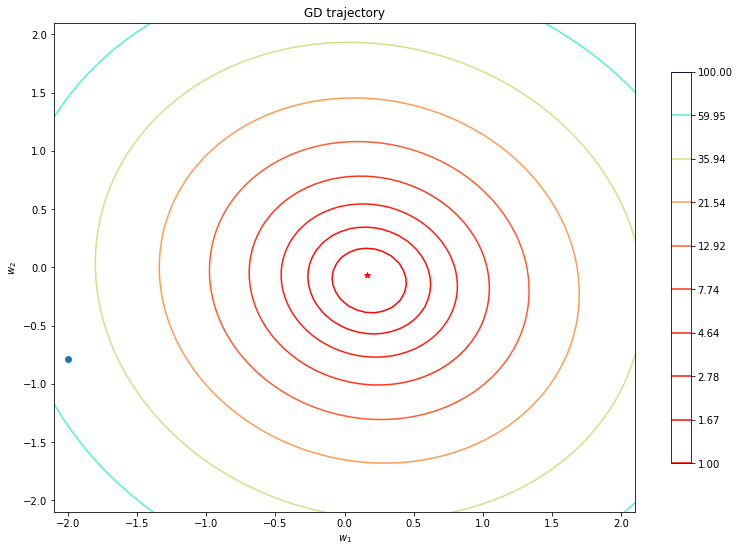

In [39]:
lr = LinearRegression(w0=w_0)
lr.fit(X, y)

plot_gd(X, y, lr.w_history)

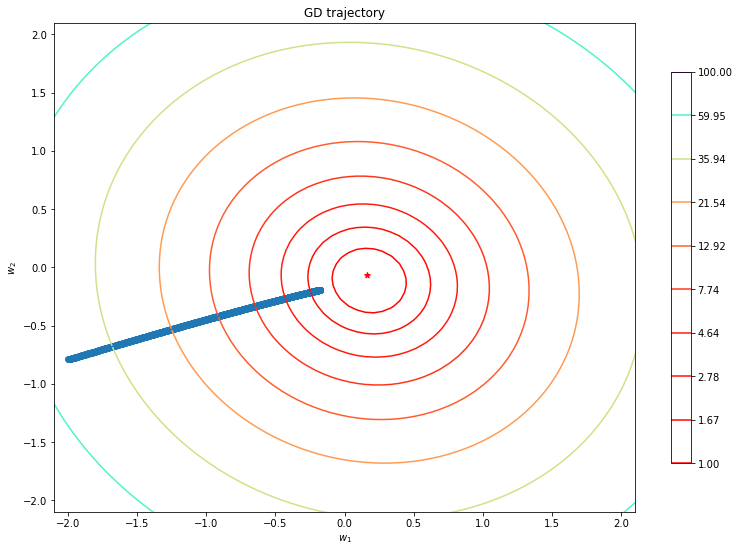

In [40]:
lr = LinearRegression(w0=w_0, alpha=0.0001)
lr.fit(X, y)
plot_gd(X, y, lr.w_history)

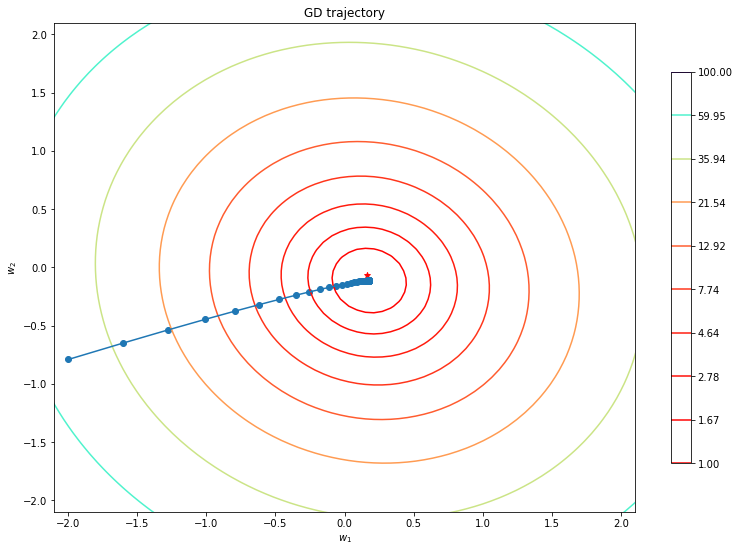

In [41]:
lr = LinearRegression(w0=w_0, alpha=0.01)
lr.fit(X, y)
plot_gd(X, y, lr.w_history)

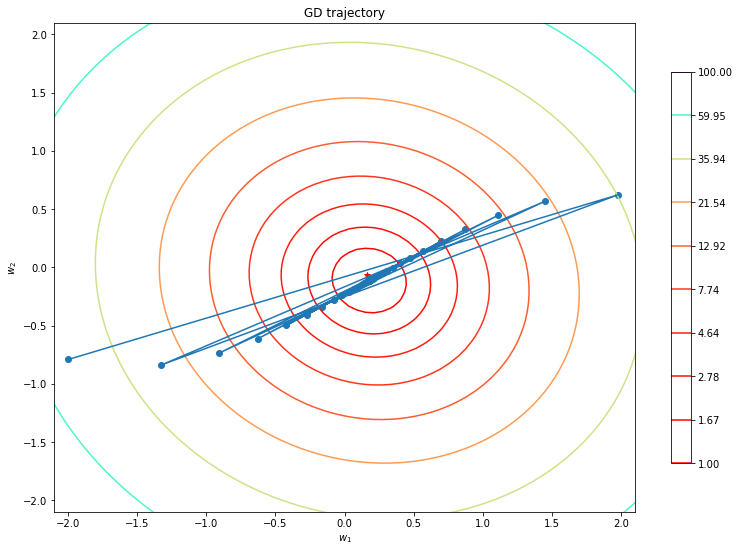

In [42]:
lr = LinearRegression(w0=w_0, alpha=0.1)
lr.fit(X, y)
plot_gd(X, y, lr.w_history)

C:\Users\9265~1\AppData\Local\Temp/ipykernel_2068/4087231705.py:55: RuntimeWarning: overflow encountered in double_scalars
  dQ += (2/l) * X[i][j] * (np.dot(X[i], self.w) - y[i])
C:\Users\9265~1\AppData\Local\Temp/ipykernel_2068/4087231705.py:55: RuntimeWarning: invalid value encountered in double_scalars
  dQ += (2/l) * X[i][j] * (np.dot(X[i], self.w) - y[i])
C:\Users\9265~1\AppData\Local\Temp/ipykernel_2068/4087231705.py:24: RuntimeWarning: invalid value encountered in subtract
  w_new = self.w - self.alpha * self.calc_gradient(X, y)


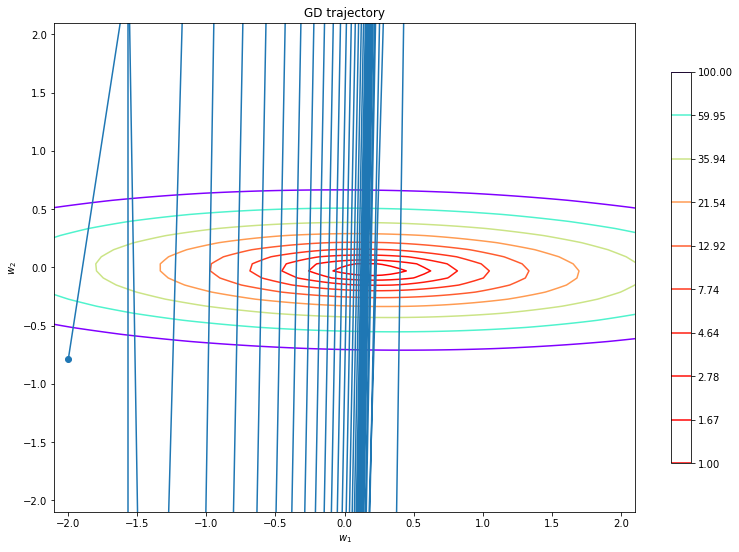

In [43]:
X_new = X.copy()
X_new[:,1] = X_new[:,1] * 5

lr = LinearRegression(w0=w_0, alpha=0.01)
lr.fit(X_new, y)
plot_gd(X_new, y, lr.w_history)

# Задание 2

In [49]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
from sklearn import metrics

In [30]:
boston = load_boston()

In [31]:
data = pd.DataFrame(boston.data)

In [32]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [33]:
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [34]:
data['PRICE'] = boston.target 

In [35]:
data.shape

(506, 14)

In [36]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [37]:
data.nunique()## Количество уникальных значений

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [38]:
data.isnull().sum() ## Проверяем на NaN 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [39]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [40]:
corr = data.corr()
corr.shape

(14, 14)

In [42]:
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4) #разделение на обучающую и тестовую выборки

In [44]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [45]:
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.12257
1,ZN,0.055678
2,INDUS,-0.008834
3,CHAS,4.693448
4,NOX,-14.435783
5,RM,3.28008
6,AGE,-0.003448
7,DIS,-1.552144
8,RAD,0.32625
9,TAX,-0.014067


In [46]:
y_pred = lm.predict(X_train)

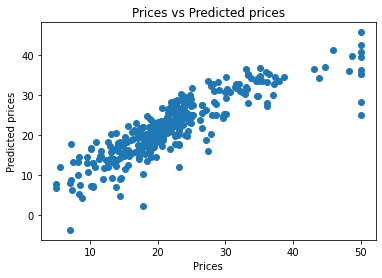

In [48]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()